# Simple sonification

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import simpleaudio as sa

def preprocess_dataframe(df):
    df = df.copy()
    # Normalize numerical columns
    scaler = MinMaxScaler()
    for column in df.select_dtypes(include=np.number).columns:
        df[column] = scaler.fit_transform(df[[column]])
    
    # Ensure durations are not zero
    if 'duration' in df.columns:
        df['duration'] = df['duration'] + 0.01  # Adding a small value to ensure durations are not zero
    
    # Encode categorical columns
    label_encoders = {}
    for column in df.select_dtypes(include='object').columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    
    return df, label_encoders

def generate_tone(frequency, duration, volume, sample_rate=44100):
    t = np.linspace(0, duration, int(sample_rate * duration), False)
    wave = volume * np.sin(frequency * t * 2 * np.pi)
    return wave

def map_features_to_audio(df, pitch_col, duration_col, volume_col, sample_rate=44100):
    waveform = np.array([])
    
    for index, row in df.iterrows():
        pitch = row[pitch_col]
        duration = row[duration_col]
        volume = row[volume_col]
        
        frequency = 440 + pitch * 440  # Example: Map pitch to frequency
        wave = generate_tone(frequency, duration, volume, sample_rate)
        
        # print(f"Row {index}: pitch={pitch}, duration={duration}, volume={volume}, frequency={frequency}, wave_len={len(wave)}")
        
        waveform = np.concatenate([waveform, wave])
    
    print(f"Final waveform length: {len(waveform)}")
    return waveform, sample_rate

def save_or_return_audio(waveform, sample_rate, filepath=None):
    if filepath:
        # Normalize waveform to int16 range
        waveform_int16 = np.int16(waveform / np.max(np.abs(waveform)) * 32767)
        sa.WaveObject(waveform_int16, 1, 2, sample_rate).save(filepath)
    else:
        return waveform, sample_rate

def sonify_dataframe(df, pitch_col, duration_col, volume_col, sample_rate=44100, filepath=None):
    df, label_encoders = preprocess_dataframe(df)
    waveform, sr = map_features_to_audio(df, pitch_col, duration_col, volume_col, sample_rate)
    return save_or_return_audio(waveform, sr, filepath)

# Example usage:
df = pd.DataFrame({
    'pitch': [0.2, 0.4, 0.6, 0.8],
    'duration': [0.5, 0.5, 0.5, 0.5],
    'volume': [0.5, 0.7, 0.9, 1.0]
})
waveform, sr = sonify_dataframe(df, 'pitch', 'duration', 'volume')

# To play the audio
if waveform is not None and len(waveform) > 0:
    play_obj = sa.play_buffer(np.int16(waveform / np.max(np.abs(waveform)) * 32767), 1, 2, sr)
    play_obj.wait_done()

Final waveform length: 1764


# Some data to sonify

In [4]:
import pandas as pd
import io
from haggle import get_kaggle_dataset

s = get_kaggle_dataset('andrewmvd/sp-500-stocks')

print(f"{list(s)}")

df = pd.read_csv(io.BytesIO(s['sp500_stocks.csv']))
print(f"{df.shape}")
df.head()

['sp500_companies.csv', 'sp500_index.csv', 'sp500_stocks.csv']
(1833938, 8)


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,44.254013,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,43.976833,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2010-01-06,MMM,44.600494,69.958191,70.735786,69.824417,70.133781,6301126.0
3,2010-01-07,MMM,44.632484,70.008362,70.033447,68.662209,69.665550,5346240.0
4,2010-01-08,MMM,44.946980,70.501671,70.501671,69.648827,69.974915,4073337.0


In [5]:
# number of unique symbols
print(f"Number of unique symbols: {df['Symbol'].nunique()}")

Number of unique symbols: 503


In [6]:
# date range (number of days)
print(f"Date range: {df['Date'].nunique()} days")

Date range: 3646 days


# Experimentations

In [19]:
import pandas as pd
import numpy as np
import simpleaudio as sa
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

def preprocess_dataframe(df):
    df = df.copy()
    # Normalize numerical columns
    scaler = MinMaxScaler()
    for column in df.select_dtypes(include=np.number).columns:
        df[column] = scaler.fit_transform(df[[column]])
    
    # Ensure durations are not zero
    if 'duration' in df.columns:
        df['duration'] = df['duration'] + 0.01  # Adding a small value to ensure durations are not zero
    
    # Encode categorical columns
    label_encoders = {}
    for column in df.select_dtypes(include='object').columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    
    return df, label_encoders

def generate_tone(frequency, duration, volume, sample_rate=44100):
    t = np.linspace(0, duration, int(sample_rate * duration), False)
    wave = volume * np.sin(frequency * t * 2 * np.pi)
    return wave

def map_features_to_audio(df, pitch_col, duration_col, volume_col, sample_rate=44100):
    waveform = np.array([])
    
    for index, row in df.iterrows():
        pitch = row[pitch_col]
        duration = row[duration_col]
        volume = row[volume_col]
        
        frequency = 440 + pitch * 440  # Example: Map pitch to frequency
        wave = generate_tone(frequency, duration, volume, sample_rate)
        
        print(f"Row {index}: pitch={pitch}, duration={duration}, volume={volume}, frequency={frequency}, wave_len={len(wave)}")
        
        waveform = np.concatenate([waveform, wave])
    
    print(f"Final waveform length: {len(waveform)}")
    return waveform, sample_rate

def save_or_return_audio(waveform, sample_rate, filepath=None):
    if filepath:
        # Normalize waveform to int16 range
        waveform_int16 = np.int16(waveform / np.max(np.abs(waveform)) * 32767)
        sa.WaveObject(waveform_int16, 1, 2, sample_rate).save(filepath)
    else:
        return waveform, sample_rate

def sonify_dataframe(df, pitch_col, duration_col, volume_col, sample_rate=44100, filepath=None):
    df, label_encoders = preprocess_dataframe(df)
    waveform, sr = map_features_to_audio(df, pitch_col, duration_col, volume_col, sample_rate)
    return save_or_return_audio(waveform, sr, filepath)

# Simple example to validate the process
data = {
    'instruction': ['play', 'stop'],
    'song_or_style_being_played': ['rock', 'jazz'],
    'chord_prediction': [0.2, 0.8],
    'recognized': ['yes', 'no'],
    'live_audio': [0.3, 0.5],
    'current_chord_identification': [0.4, 0.6],
    'decide_on_live_chord': [0.7, 0.9],
    'play_accompaniment': ['no', 'yes'],
    'played_audio': [0.5, 0.2],
    'chords': ['Cmaj', 'Gmaj'],
    'gen_audio': [0.6, 0.4],
    'style': ['pop', 'classical'],
    'sheet_music': ['sheet1', 'sheet2'],
    'music_xml': ['xml1', 'xml2'],
    'midi': ['midi1', 'midi2'],
    'audio': ['audio1', 'audio2']
}

df = pd.DataFrame(data)

# Apply sonification function
waveform, sr = sonify_dataframe(df, pitch_col='chord_prediction', duration_col='live_audio', volume_col='current_chord_identification')

# To play the audio
if waveform is not None and len(waveform) > 0:
    play_obj = sa.play_buffer(np.int16(waveform / np.max(np.abs(waveform)) * 32767), 1, 2, sr)
    play_obj.wait_done()

Row 0: pitch=0.0, duration=0.0, volume=0.0, frequency=440.0, wave_len=0
Row 1: pitch=1.0, duration=1.0, volume=1.0, frequency=880.0, wave_len=44100
Final waveform length: 44100


array([], dtype=float64)

# Diagrams

In [20]:
from qo import dgdisp

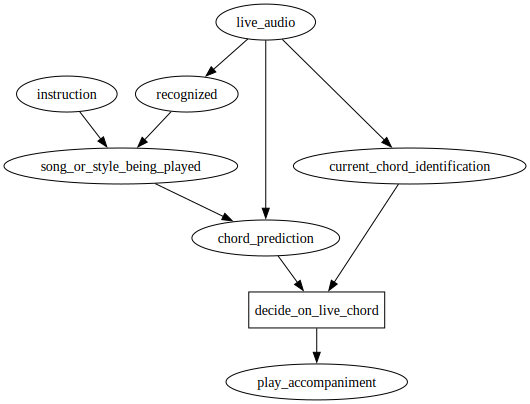

In [38]:
dgdisp("""
    instruction, recognized -> song_or_style_being_played
    live_audio -> recognized
    live_audio -> chord_prediction, current_chord_identification -> [decide_on_live_chord]
    song_or_style_being_played -> chord_prediction
    decide_on_live_chord -> play_accompaniment
""")

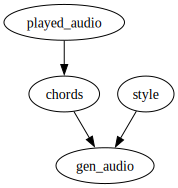

In [41]:
dgdisp("""
played_audio -> chords
chords -> gen_audio
style -> gen_audio
""")

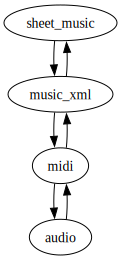

In [44]:
dgdisp("""
sheet_music -> music_xml -> midi -> audio
audio -> midi -> music_xml -> sheet_music
""")

# algorithmic accompaniment generation 

# Lunar impact crater data

In [ ]:
# From 
"""
data2midi-part1.py: Maps lunar impact crater data (.csv) into musical notes (.mid).

Written by Matt Russo
www.astromattrusso.com
www.system-sounds.com
"""

#### install libraries (with pip) if necesssary################################
# import sys
# import subprocess
# for package in ['pandas','matplotlib', 'audiolazy', 'midiutil']:
#     subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])

################################################
import pandas as pd   # https://pypi.org/project/pandas/
import matplotlib.pylab as plt  # https://pypi.org/project/matplotlib/
from audiolazy import str2midi # https://pypi.org/project/audiolazy/
from midiutil import MIDIFile # https://midiutil.readthedocs.io/en/1.2.1/

##############################################################################
filename = 'lunarCraterAges'  #filename of csv with data

duration_beats = 52.8 #desired duration in beats (1 beat = 1 second if bpm=60)
bpm = 60 #tempo (beats per minute)

y_scale = 0.5  #scaling parameter for y-axis data (1 = linear)

#note set for mapping (or use a few octaves of a specific scale)
note_names = ['C1','C2','G2',
             'C3','E3','G3','A3','B3',
             'D4','E4','G4','A4','B4',
             'D5','E5','G5','A5','B5',
             'D6','E6','F#6','G6','A6']

vel_min,vel_max = 35,127   #minimum and maximum note velocity

##############################################################################
def map_value(value,min_value,max_value,min_result,max_result):
    '''maps value (or array of values) from one range to another'''
    result = min_result + (value - min_value)/(max_value-min_value)*(max_result - min_result)
    return result
##############################################################################

## Load data

# This doesn't work because the file was referenced assuming locality
# df = pd.read_csv('./data/' +filename + '.csv')  #load data as a pandas dataframe

# ... so instead we'll do it this way -----------------------------
from graze import graze
import io

url = 'https://raw.githubusercontent.com/SYSTEMSounds/sonification-tutorials/main/data/lunarCraterAges.csv'
_bytes = graze(url)
df = pd.read_csv(io.BytesIO(_bytes))
# -----------------------------


n_impacts = len(df)

ages = df['age'].values    #this is a numpy array (not a list), you can do mathematical operations directly on the object
diameters = df['diameter'].values

## Compress Time
t_data = map_value(ages, min(ages), max(ages), duration_beats, 0) #compress time from Myrs to beats, largest age (oldest crater) mapped to beat 0

## Calculate duration in seconds
duration_sec = max(t_data)*60/bpm #duration in seconds (actually, onset of last note)
print('Duration:',duration_sec,'seconds')

## Normalize and scale y-axis data
y_data = map_value(diameters, min(diameters), max(diameters), 0, 1) #normalize data, so it runs from 0 to 1 (makes scaling easier)
y_data = y_data**y_scale

## Make list of MIDI numbers of chosen notes for mapping
note_midis = [str2midi(n) for n in note_names] #make a list of midi note numbers
n_notes = len(note_midis)
print('Resolution:',n_notes,'notes')

## Map y-axis data to MIDI notes and velocity
midi_data = []
vel_data = []
for i in range(n_impacts):
    note_index = round(map_value(y_data[i], 0, 1, n_notes-1, 0)) #bigger craters are mapped to lower notes
    midi_data.append(note_midis[note_index])

    note_velocity = round(map_value(y_data[i], 0, 1, vel_min, vel_max)) #bigger craters will be louder
    vel_data.append(note_velocity)

## Save MIDI file
my_midi_file = MIDIFile(1) #one track
my_midi_file.addTempo(track=0, time=0, tempo=bpm)

for i in range(n_impacts):
    my_midi_file.addNote(track=0, channel=0, pitch=midi_data[i], time=t_data[i] , duration=2, volume=vel_data[i])

with open(filename + '.mid', "wb") as f:
    my_midi_file.writeFile(f)
print('Saved',filename + '.mid')

Duration: 52.8 seconds
Resolution: 23 notes
Saved lunarCraterAges.mid


In [ ]:
# play the midi file
import pygame
pygame.init()
pygame.mixer.music.load(filename + '.mid')
pygame.mixer.music.play()

In [ ]:
pygame.mixer.music.stop()

,names,longitude,latitude,diameter,age
0,Copernicus,339.92969,9.63280,96.7,797
1,Tycho,348.71469,-43.25890,85.7,85
2,King,120.49220,4.93750,76.2,992
3,Jackson,196.68950,22.04000,71.4,147
4,Ohm,246.27397,18.28491,64.3,291
...,...,...,...,...,...
106,NaN,207.41400,34.97010,10.1,587
107,Democritus A,32.48777,61.59411,10.1,218
108,Mercurius H,63.47180,49.17610,10.1,181
109,NaN,131.86929,-37.40430,10.1,110


# Scrap